    input_size algorithm  mean_time  std_time
0           10   kruskal   0.708297  0.014173
1           10      prim   0.705325  0.006808
2           25   kruskal   0.715250  0.013297
3           25      prim   0.713972  0.010627
4           50   kruskal   0.712419  0.011010
5           50      prim   0.721727  0.027380
6           75   kruskal   0.723354  0.021264
7           75      prim   0.720483  0.020847
8          100   kruskal   0.749237  0.049918
9          100      prim   0.739574  0.041423
10         150   kruskal   0.723012  0.011381
11         150      prim   0.736569  0.023693
12         200   kruskal   0.827213  0.111277
13         200      prim   0.768191  0.018731
14         250   kruskal   0.844467  0.059358
15         250      prim   0.829079  0.074347
16         300   kruskal   0.840694  0.052223
17         300      prim   0.816254  0.017414
18         400   kruskal   0.876467  0.012036
19         400      prim   0.887162  0.020580
20         500   kruskal   0.96443

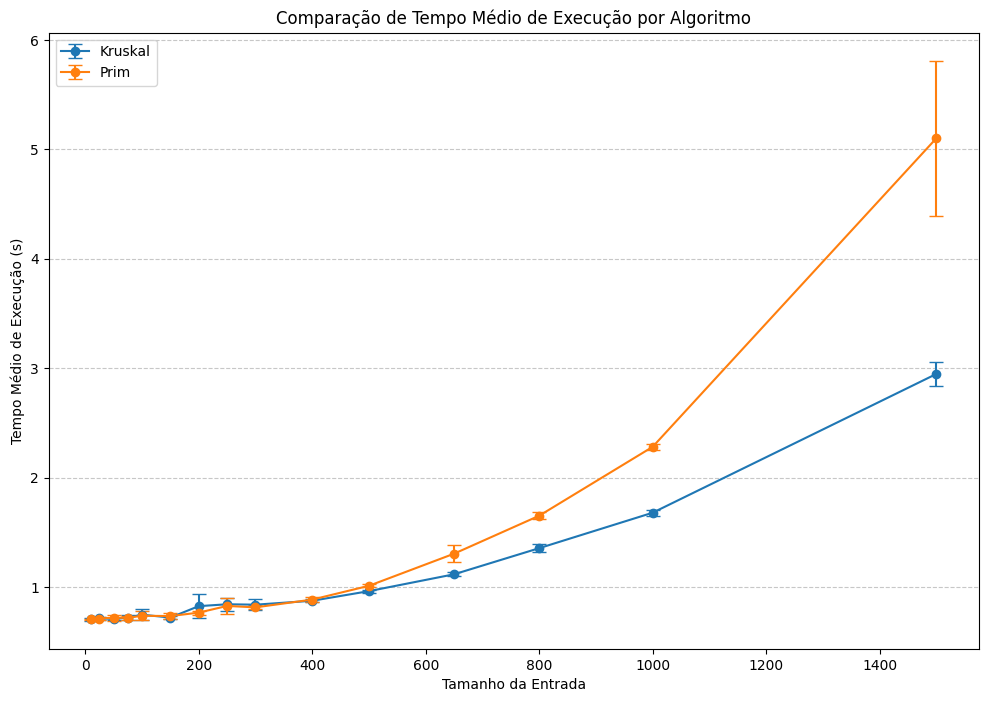

Gráfico salvo em: ./logs/analysis/execution_time_comparison.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_results(input_file, output_folder):
    """
    Analisa os resultados do arquivo CSV e gera métricas e gráficos.

    :param input_file: Caminho para o arquivo CSV contendo os resultados.
    :param output_folder: Pasta onde os gráficos serão salvos.
    """
    # Lê o arquivo CSV
    df = pd.read_csv(input_file)

    # Extrai o tamanho da entrada a partir do nome do arquivo
    df['input_size'] = df['input_file'].str.split('.').str[0].str.split('Entrada ').str[1].astype(int)

    # Calcula as métricas (média e desvio padrão) para cada combinação de tamanho de entrada e algoritmo
    metrics = df.groupby(['input_size', 'algorithm']).agg(
        mean_time=('execution_time', 'mean'),
        std_time=('execution_time', 'std')
    ).reset_index()

    # Exibe as métricas no console
    print(metrics)

    # Gera um único gráfico de linha para os dois algoritmos
    plt.figure(figsize=(12, 8))
    algorithms = metrics['algorithm'].unique()

    for algorithm in algorithms:
        algo_data = metrics[metrics['algorithm'] == algorithm]
        plt.errorbar(
            algo_data['input_size'], 
            algo_data['mean_time'], 
            yerr=algo_data['std_time'], 
            label=algorithm.capitalize(), 
            capsize=5, 
            marker='o', 
            linestyle='-'
        )

    # Configurações do gráfico
    plt.xlabel('Tamanho da Entrada')
    plt.ylabel('Tempo Médio de Execução (s)')
    plt.title('Comparação de Tempo Médio de Execução por Algoritmo')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Salva o gráfico
    output_path = os.path.join(output_folder, 'execution_time_comparison.png')
    plt.savefig(output_path)
    plt.show()

    print(f"Gráfico salvo em: {output_path}")

# Configurações
input_file = './logs/results.csv'  # Caminho para o arquivo CSV
output_folder = './logs/analysis'  # Pasta onde os gráficos serão salvos

# Cria a pasta de saída, se não existir
os.makedirs(output_folder, exist_ok=True)

# Executa a análise
analyze_results(input_file, output_folder)